In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import time
import pymongo
import itertools
from concurrent.futures import ProcessPoolExecutor

from data_structure import DataStructure as ds
from machine_learning.kNN import kNN
from common.log import *
from common.config import Config
# import train
from train.train_news_effect_price import News_effect_price

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

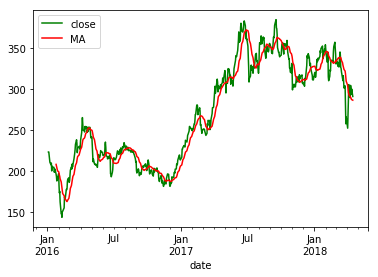

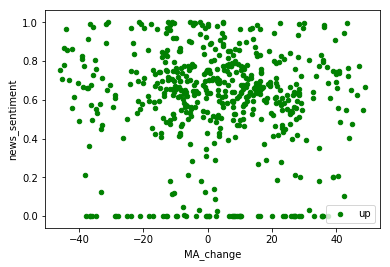

In [29]:
# %%time
stock = '特斯拉'
train = News_effect_price()
df = train.deal_data(stock)
df['change'] = df['close'] - df['close'].shift(1)
df

df['MA'] = df.close.rolling(15).mean()
df

ax = df.plot(kind='line', x='date', y='close', label='close', color='Green')
ax = df.plot(kind='line', x='date', y='MA', label='MA', color='Red', ax=ax)

df['MA_change'] = df['MA'] - df['MA'].shift(15)
df

# df = pd.DataFrame({'A': [0, 1, 2, 3, 4]})
# df
# df.rolling(2, win_type='triang').sum()
# df.rolling(3).mean()

# up_df = df.loc[df.change > 0, :]
# down_df = df.loc[df.change < 0, :]

ax = df.plot(kind='scatter', x='MA_change', y='news_sentiment', label='up', color='Green')
# ax = up_df.plot(kind='scatter', x='change', y='news_sentiment', label='up', color='Green')
# ax = down_df.plot(kind='scatter', x='change', y='news_sentiment', label='down', color='Red', ax=ax)